# Graph Structure
A graph is a set of nodes that are connected to each other in the form of a network. First of all, we’ll define the two basic components of a graph.

## Vertex
A vertex is the most essential part of a graph. A collection of vertices forms a graph. In that sense, vertices are similar to linked list nodes.

## Edge
An edge is the link between two vertices. It can be uni-directional or bi-directional depending on your graph. An edge can also have a cost associated with it (will be discussed in detail later).

## Graph Terminologies

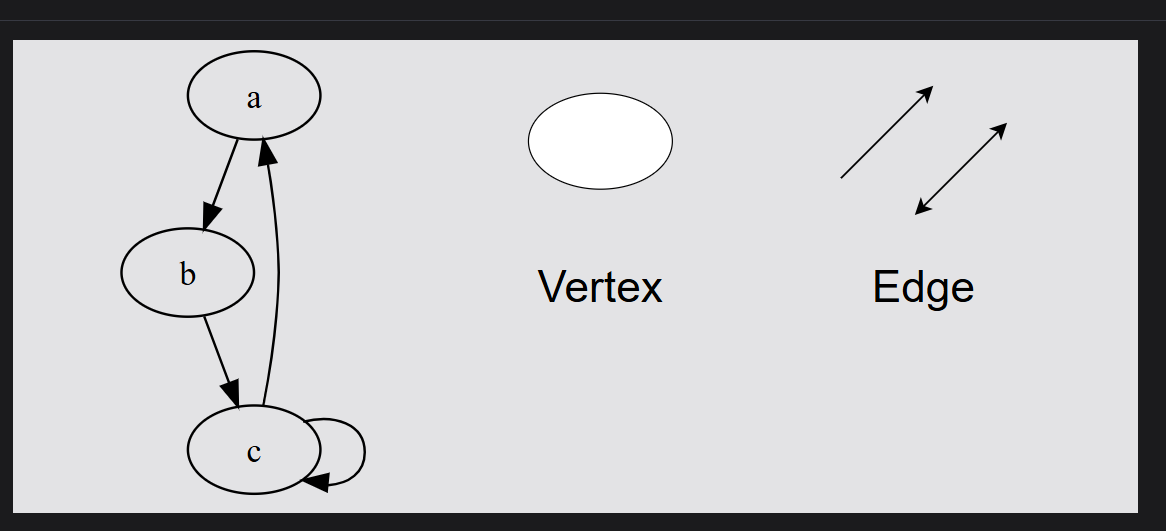
1. Degree of a Vertex: The total number of edges incident on a vertex. There are two types of degrees:

    In-Degree: The total number of incoming edges of a vertex.

    Out-Degree: The total number of outgoing edges of a vertex.

2. Parallel Edges: Two undirected edges are parallel if they have the same end vertices. Two directed edges are parallel if they have the same starting and ending vertices.

3. Self Loop: This occurs when an edge starts and ends on the same vertex.

4. Adjacency: Two vertices are said to be adjacent if there is an edge connecting them directly.

In the illustration above, the in-degree of both a and b is 1. The same goes for the out-degree of the vertices. The in-degree and out-degree for c are 2 as it contains a self-loop.

# Types of Graphs

# Undirected Graph
In an undirected graph, the edges are bi-directional. For example, an ordered pair (2, 3) shows that there exists an edge between vertex 2 and 3 without any specific direction. You can go from vertex 2 to 3 or from 3 to 2.

Let’s calculate the maximum number of edges for an undirected graph. We are denoting an edge between vertex a and b as (a, b). So, the maximum possible edges of a graph with n vertices will be all possible pairs of vertices of that graph, assuming that there are no self-loops.

If a graph has n vertices, then there are $C(n,2)$ possible pairs of vertices according to Combinatorics. Solving $C(n,2)$ by binomial coefficients gives us $\frac{n(n-1)}{2}$. Hence, there are $\frac{n(n-1)}{2}$ maximum possible edges in an undirected graph.

You can see an example of an undirected graph below:

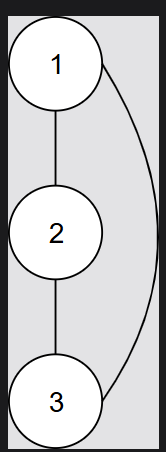

## Directed Graph
In a directed graph, the edges are unidirectional. For a pair (2, 3), there exists an edge from vertex 2 towards vertex 3 and the only way to traverse is to go from 2 to 3, not the other way around.

This changes the maximum number of edges that can exist in the graph. For a directed graph with n vertices, the minimum number of edges that can connect a vertex with every other vertex is n-1. This excludes self-loops.

If you have n vertices, then all the possible edges become n*(n-1).

Here’s an example of a directed graph:
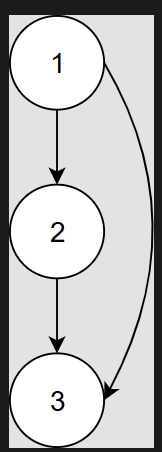

# LinkedList

In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next_element = None


class LinkedList:
    def __init__(self):
        self.head_node = None

    def get_head(self):
        return self.head_node

    def is_empty(self):
        if self.head_node is None:  # Check whether the head is None
            return True
        else:
            return False

    def insert_at_head(self, dt):
        temp_node = Node(dt)
        if self.is_empty():
            self.head_node = temp_node
            return self.head_node
        temp_node.next_element = self.head_node
        self.head_node = temp_node
        return self.head_node

    # Inserts a value at the end of the list
    def insert_at_tail(self, value):
        # Creating a new node
        new_node = Node(value)
        # Check if the list is empty, if it is simply point head to new node
        if self.get_head() is None:
            self.head_node = new_node
            return
        # if list not empty, traverse the list to the last node
        temp = self.get_head()
        while temp.next_element is not None:
            temp = temp.next_element
        # Set the nextElement of the previous node to new node
        temp.next_element = new_node
        return

    def length(self):
        # start from the first element
        curr = self.get_head()
        length = 0

        # Traverse the list and count the number of nodes
        while curr is not None:
            length += 1
            curr = curr.next_element
        return length

    def print_list(self):
        if self.is_empty():
            print("List is Empty")
            return False
        temp = self.head_node
        while temp.next_element is not None:
            print(temp.data, end=" -> ")
            temp = temp.next_element
        print(temp.data, "-> None")
        return True

    def delete_at_head(self):
        # Get Head and firstElement of List
        first_element = self.get_head()
        # If List is not empty then link head to the
        # nextElement of firstElement.
        if first_element is not None:
            self.head_node = first_element.next_element
            first_element.next_element = None
        return

    def delete(self, value):
        deleted = False
        if self.is_empty():  # Check if list is empty -> Return False
            print("List is Empty")
            return deleted
        current_node = self.get_head()  # Get current node
        previous_node = None  # Get previous node
        if current_node.data is value:
            self.delete_at_head()  # Use the previous function
            deleted = True
            return deleted

        # Traversing/Searching for Node to Delete
        while current_node is not None:
            # Node to delete is found
            if value is current_node.data:
                # previous node now points to next node
                previous_node.next_element = current_node.next_element
                current_node.next_element = None
                deleted = True
                break
            previous_node = current_node
            current_node = current_node.next_element

        return deleted

    def search(self, dt):
        if self.is_empty():
            print("List is Empty")
            return None
        temp = self.head_node
        while temp is not None:
            if temp.data is dt:
                return temp
            temp = temp.next_element

        print(dt, " is not in List!")
        return None

    def remove_duplicates(self):
        if self.is_empty():
            return

        # If list only has one node, leave it unchanged
        if self.get_head().next_element is None:
            return

        outer_node = self.get_head()
        while outer_node:
            inner_node = outer_node  # Iterator for the inner loop
            while inner_node:
                if inner_node.next_element:
                    if outer_node.data == inner_node.next_element.data:
                        # Duplicate found, so now removing it
                        new_next_element = inner_node.next_element.next_element
                        inner_node.next_element = new_next_element
                    else:
                        # Otherwise simply iterate ahead
                        inner_node = inner_node.next_element
                else:
                    # Otherwise simply iterate ahead
                    inner_node = inner_node.next_element
            outer_node = outer_node.next_element
        return

# Graph Class

In [4]:
class Graph:
    def __init__(self, vertices):
        # Total number of vertices
        self.vertices = vertices
        # definining a list which can hold multiple LinkedLists
        # equal to the number of vertices in the graph
        self.array = []
        # Creating a new Linked List for each vertex/index of the list
        for i in range(vertices):
            self.array.append(LinkedList())

    # Function to add an edge from source to destination
    def add_edge(self, source, destination):
        if source < self.vertices and destination < self.vertices:
            # As we are implementing a directed graph, (1,0) is not equal to (0,1)
            self.array[source].insert_at_head(destination)
            # Uncomment the following line for undirected graph
            # self.array[destination].insert_at_head(source)

        # If we were to implement an Undirected Graph i.e (1,0) == (0,1)
        # We would create an edge from destination towards source as well
        # i.e self.list[destination].insertAtHead(source)

    def print_graph(self):
        print(">>Adjacency List of Directed Graph<<")
        for i in range(self.vertices):
            print("|", i, end=" | => ")
            temp = self.array[i].get_head()
            while temp is not None:
                print("[", temp.data, end=" ] -> ")
                temp = temp.next_element
            print("None")